# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [12]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [16]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
display(df.head())
display(df.tail())

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236
22555,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252


In [14]:
df.isna().sum()

YEAR               0
MAKE               0
MODEL              0
VEHICLE CLASS      0
ENGINE SIZE        0
CYLINDERS          0
TRANSMISSION       0
FUEL               0
CITY (L/100 km)    0
HWY (L/100 km)     0
COMB (L/100 km)    0
COMB (mpg)         0
EMISSIONS          0
dtype: int64

In [3]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

In [18]:
df['EMISSIONS'].describe()

count    22556.000000
mean       250.068452
std         59.355276
min         83.000000
25%        209.000000
50%        243.000000
75%        288.000000
max        608.000000
Name: EMISSIONS, dtype: float64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [ ]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
print(f"산술평균: {df['EMISSIONS'].mean()}")
print(f"중앙값: {df['EMISSIONS'].median()}")
print(f"최빈값: {df['EMISSIONS'].mode().values}")

# TODO 2: 절사평균 계산
print(f"절사평균: {stats.trim_mean(df['EMISSIONS'],0.1):2f}")

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
three_class = df[df['VEHICLE CLASS'].isin(['COMPACT','MID-SIZE','SUV'])]
group_mean = three_class.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
weights = np.array([50,30,20])
weighted_mean = np.average(group_mean, weights=weights)
print(f"가중평균: {weighted_mean}")

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
group_median = three_class.groupby('VEHICLE CLASS')['EMISSIONS'].median()
print(f"차량등급별 평균: {group_mean}")
print(f"차량등급별 중앙값: {group_median}")

# TODO 5: 결과 해석 (print문으로 작성)


산술평균: 250.06845185316544
중앙값: 243.0
최빈값: [221]
절사평균: 247.343733
가중평균: 226.59704862839652
차량등급별 평균: VEHICLE CLASS
COMPACT     211.036798
MID-SIZE    223.393478
SUV         270.303030
Name: EMISSIONS, dtype: float64
차량등급별 중앙값: VEHICLE CLASS
COMPACT     207.0
MID-SIZE    223.0
SUV         267.0
Name: EMISSIONS, dtype: float64


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

In [50]:
comb = df['COMB (L/100 km)']
engine_size = df['ENGINE SIZE']
comb.describe()

count    22556.000000
mean        11.034341
std          2.910920
min          3.600000
25%          9.100000
50%         10.600000
75%         12.700000
max         26.100000
Name: COMB (L/100 km), dtype: float64

분산: 8.47, 1.78
범위: 22.50, 7.60
IQR: 3.60, 1.90
변동계수(CV): 0.26, 0.40
COMB (L/100 km) 이상치 개수: 548


209    18.4
210    18.3
211    19.9
212    19.2
213    19.9
Name: COMB (L/100 km), dtype: float64

ENGINE SIZE 이상치 개수: 41


207     8.0
208     8.0
867     8.0
868     8.0
1568    8.0
Name: ENGINE SIZE, dtype: float64

COMB (L/100 km) 이상치 개수: 219


211     19.9
213     19.9
215     22.7
1430    20.7
1433    19.9
Name: COMB (L/100 km), dtype: float64

ENGINE SIZE 이상치 개수: 41


207     8.0
208     8.0
867     8.0
868     8.0
1568    8.0
Name: ENGINE SIZE, dtype: float64

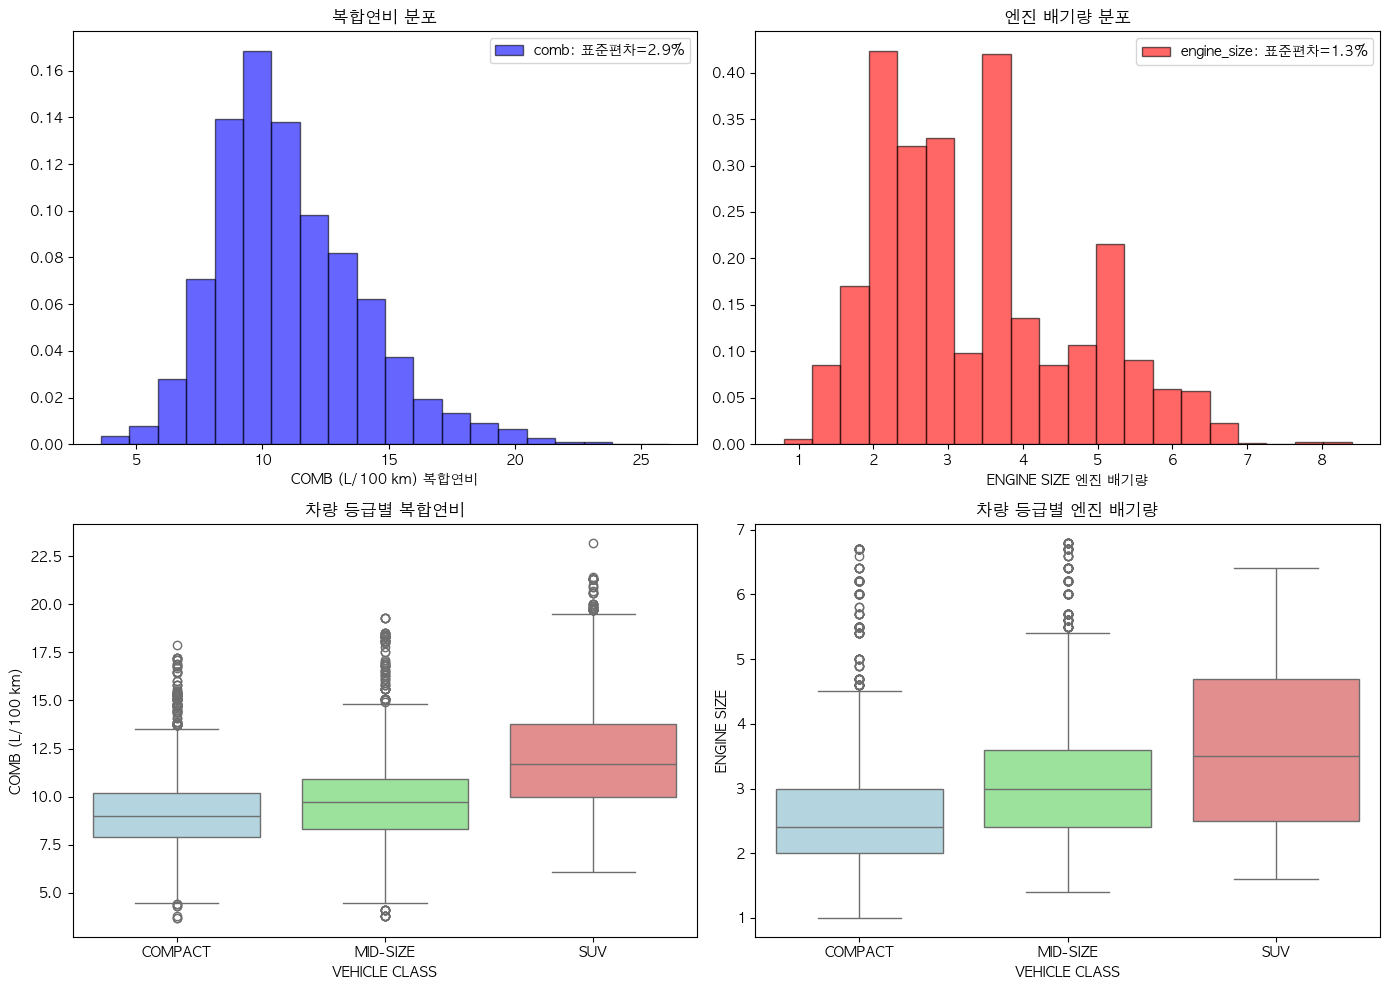

복합연비 표준편차: VEHICLE CLASS
COMPACT     2.034642
MID-SIZE    2.328445
SUV         2.705243
Name: COMB (L/100 km), dtype: float64
엔진 배기량 표준편차: VEHICLE CLASS
COMPACT     1.094514
MID-SIZE    1.144793
SUV         1.198494
Name: ENGINE SIZE, dtype: float64


In [82]:
# TODO 1: 두 변수의 산포 측도 계산
comb = df['COMB (L/100 km)']
engine_size = df['ENGINE SIZE']
print(f"분산: {comb.var():.2f}, {engine_size.var():.2f}")
print(f"범위: {comb.max() - comb.min():.2f}, {engine_size.max() - engine_size.min():.2f}")

comb_q3 = comb.quantile(0.75)
comb_q1 = comb.quantile(0.25)
comb_iqr = comb_q3 - comb_q1

engine_size_q3 = engine_size.quantile(0.75)
engine_size_q1 = engine_size.quantile(0.25)
engine_size_iqr = engine_size_q3 - engine_size_q1

print(f"IQR: {comb_iqr:.2f}, {engine_size_iqr:.2f}")

# TODO 2: 변동계수(CV) 계산
print(f"변동계수(CV): {comb.std()/comb.mean():.2f}, {engine_size.std()/engine_size.mean():.2f}")

# TODO 3: 이상치 탐지 (IQR, Z-score)
comb_upper = comb_q3 + 1.5 * comb_iqr
comb_lower = comb_q1 - 1.5 * comb_iqr
comb_iqr_outliers = comb[(comb > comb_upper) | (comb < comb_lower)]

engine_size_upper = engine_size_q3 + 1.5 * engine_size_iqr
engine_size_lower = engine_size_q1 - 1.5 * engine_size_iqr
engine_size_iqr_outliers = engine_size[(engine_size > engine_size_upper) | (engine_size < engine_size_lower)]

print(f"COMB (L/100 km) 이상치 개수: {len(comb_iqr_outliers)}")
display(comb_iqr_outliers.head())
print(f"ENGINE SIZE 이상치 개수: {len(engine_size_iqr_outliers)}")
display(engine_size_iqr_outliers.head())

comb_z = (comb - comb.mean()) / comb.std()
comb_z_outliers = comb[np.abs(comb_z)>3] # z-score 절댓값이 3 초과인지 확인 후 추출

engine_size_z = (engine_size - engine_size.mean()) / engine_size.std() 
engine_size_z_outliers = engine_size[np.abs(engine_size_z)>3]

print(f"COMB (L/100 km) 이상치 개수: {len(comb_z_outliers)}")
display(comb_z_outliers.head())
print(f"ENGINE SIZE 이상치 개수: {len(engine_size_z_outliers)}")
display(engine_size_z_outliers.head())

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
# 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].hist(comb, bins=20, alpha=0.6, color='blue', edgecolor='black',
             label=f'comb: 표준편차={comb.std():.1f}%', density=True)
axes[0,1].hist(engine_size, bins=20, alpha=0.6, color='red', edgecolor='black',
             label=f'engine_size: 표준편차={engine_size.std():.1f}%', density=True)
axes[0,0].set_xlabel('COMB (L/100 km) 복합연비')
axes[0,0].set_title('복합연비 분포')
axes[0,1].set_xlabel('ENGINE SIZE 엔진 배기량')
axes[0,1].set_title('엔진 배기량 분포')
axes[0,0].legend()
axes[0,1].legend()

sns.boxplot(data=three_class, x='VEHICLE CLASS', y='COMB (L/100 km)',
            palette=['lightblue', 'lightgreen', 'lightcoral'], ax=axes[1,0])
sns.boxplot(data=three_class, x='VEHICLE CLASS', y='ENGINE SIZE',
            palette=['lightblue', 'lightgreen', 'lightcoral'], ax=axes[1,1])

axes[1,0].set_title('차량 등급별 복합연비')
axes[1,1].set_title('차량 등급별 엔진 배기량')

plt.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
comb_std = three_class.groupby('VEHICLE CLASS')['COMB (L/100 km)'].std()
engine_size_std = three_class.groupby('VEHICLE CLASS')['ENGINE SIZE'].std()
print(f"복합연비 표준편차: {comb_std}")
print(f"엔진 배기량 표준편차: {engine_size_std}")

# TODO 6: 결과 해석

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

왜도: 
ENGINE SIZE        0.631264
COMB (L/100 km)    0.817065
COMB (mpg)         1.172800
EMISSIONS          0.534641
dtype: float64
첨도: 
ENGINE SIZE       -0.394947
COMB (L/100 km)    1.054642
COMB (mpg)         3.643618
EMISSIONS          0.615430
dtype: float64


,ENGINE SIZE,COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000
mean,3.356646,11.034341,27.374534,250.068452
median,3.000000,10.600000,27.000000,243.000000
std,1.335425,2.910920,7.376982,59.355276
var,1.783360,8.473455,54.419860,3523.048828
iqr,1.900000,3.600000,9.000000,79.000000
skewness,0.631264,0.817065,1.172800,0.534641
kurtois,-0.394947,1.054642,3.643618,0.615430


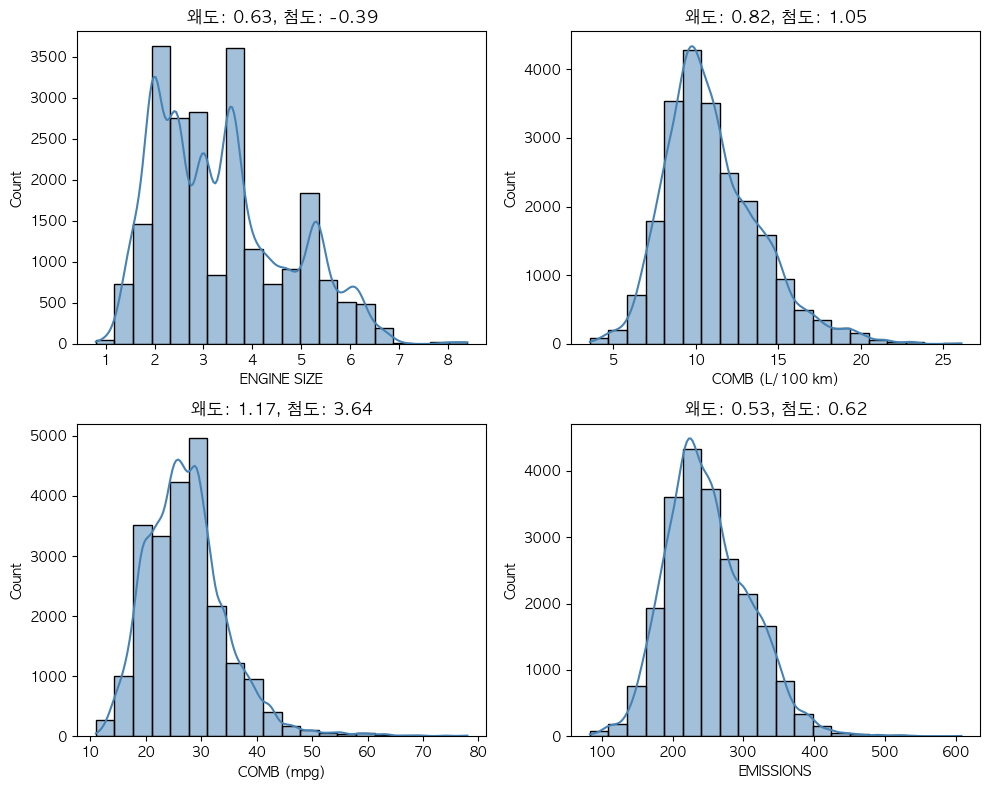

연료타입 별 EMISSIONS 왜도 비교 
FUEL
D   -0.367713
E   -0.189320
N   -1.851785
X    0.330538
Z    0.997177
Name: EMISSIONS, dtype: float64
연료타입 별 EMISSIONS 첨도 비교 
FUEL
D   -1.042831
E   -0.256257
N    3.071255
X   -0.292857
Z    1.607523
Name: EMISSIONS, dtype: float64


In [ ]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
print(f"왜도: \n{df[numeric_cols].skew()}")
print(f"첨도: \n{df[numeric_cols].kurt()}")

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
result = pd.DataFrame({
    'count':df[numeric_cols].count(),
    'mean':df[numeric_cols].mean(),
    'median':df[numeric_cols].median(),
    'std':df[numeric_cols].std(),
    'var':df[numeric_cols].var(),
    'iqr':df[numeric_cols].quantile(0.75)-df[numeric_cols].quantile(0.25),
    'skewness':df[numeric_cols].skew(),
    'kurtois':df[numeric_cols].kurt()
}).T
display(result)

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)

fig, axes = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(df[numeric_cols[0]], bins=20, kde=True, ax=axes[0,0], color='steelblue')
sns.histplot(df[numeric_cols[1]], bins=20, kde=True, ax=axes[0,1], color='steelblue')
sns.histplot(df[numeric_cols[2]], bins=20, kde=True, ax=axes[1,0], color='steelblue')
sns.histplot(df[numeric_cols[3]], bins=20, kde=True, ax=axes[1,1], color='steelblue')
axes[0,0].set_title(f'왜도: {df[numeric_cols[0]].skew():.2f}, 첨도: {df[numeric_cols[0]].kurt():.2f}')
axes[0,1].set_title(f'왜도: {df[numeric_cols[1]].skew():.2f}, 첨도: {df[numeric_cols[1]].kurt():.2f}')
axes[1,0].set_title(f'왜도: {df[numeric_cols[2]].skew():.2f}, 첨도: {df[numeric_cols[2]].kurt():.2f}')
axes[1,1].set_title(f'왜도: {df[numeric_cols[3]].skew():.2f}, 첨도: {df[numeric_cols[3]].kurt():.2f}')

plt.tight_layout()
plt.show()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
skew_emissions_fuel = df.groupby('FUEL')['EMISSIONS'].skew()
kurt_emissions_fuel = df.groupby('FUEL')['EMISSIONS'].kurt()
print(f"연료타입 별 EMISSIONS 왜도 비교 \n{skew_emissions_fuel}")
print(f"연료타입 별 EMISSIONS 첨도 비교 \n{kurt_emissions_fuel}")

# TODO 5: 결과 해석

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [7]:
import math


def my_mean(data):
    """
    산술평균: 합계 / 개수
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        산술평균 값
    
    Examples
    --------
    >>> my_mean([1, 2, 3, 4, 5])
    3.0
    >>> my_mean([10, 20, 30])
    20.0
    """
    pass


def my_trimmed_mean(data, proportion):
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """
    pass


def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    pass


def my_median(data):
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    pass


def my_mode(data):
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    pass


def my_variance(data, ddof=0):
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    pass


def my_std(data, ddof=0):
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    pass


def my_percentile(data, q):
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    pass


def my_iqr(data):
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    pass

In [8]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ❌ 기본 데이터: 미구현
  ❌ 홀수 개: 미구현
  ❌ 단일 값: 미구현
  ❌ 음수 포함: 미구현

[my_trimmed_mean]
  ❌ 20% 절사: 미구현
  ❌ 10% 절사: 미구현
  ❌ 0% 절사: 미구현

[my_weighted_mean]
  ❌ 학점 계산: 미구현
  ❌ 동일 가중치: 미구현
  ❌ 가중치 다름: 미구현

[my_median]
  ❌ 짝수 개: 미구현
  ❌ 홀수 개: 미구현
  ❌ 단일 값: 미구현
  ❌ 음수 포함: 미구현

[my_mode]
  ❌ 기본 (5가 2번): 미구현
  ❌ 홀수 (1이 2번): 미구현
  ❌ 동일 값: 미구현

[my_variance]
  ❌ 모분산 (ddof=0): 미구현
  ❌ 표본분산 (ddof=1): 미구현
  ❌ 동일 값 → 0: 미구현

[my_std]
  ❌ 모표준편차: 미구현
  ❌ 표본표준편차: 미구현
  ❌ 동일 값 → 0: 미구현

[my_percentile] - Nearest Rank 방식
  ❌ 0% (최솟값): 미구현
  ❌ 50% (중앙값): 미구현
  ❌ 100% (최댓값): 미구현
  ❌ 25%: 미구현
  ❌ 75%: 미구현

[my_iqr]
  ❌ 기본 데이터: 미구현
  ❌ 동일 값 → 0: 미구현

결과: 0/30 통과 (0%)
⚠️ 일부 테스트 실패 - 로직을 확인하세요
